# カーネル法を用いたサポートベクターマシン

## 線形モデルと非線形特徴
下記のような例ではSVMで境界を引くことができない。

Text(0, 0.5, 'Feature 1')

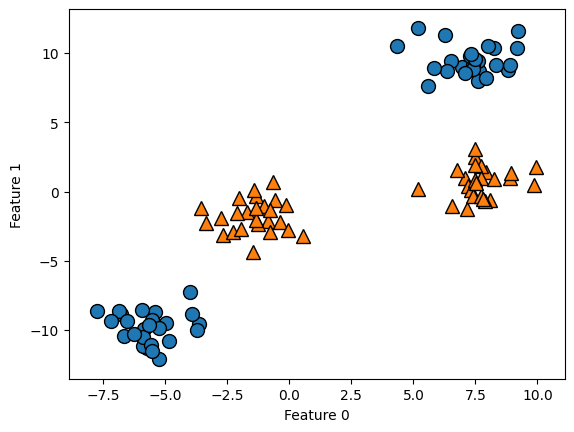

In [1]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

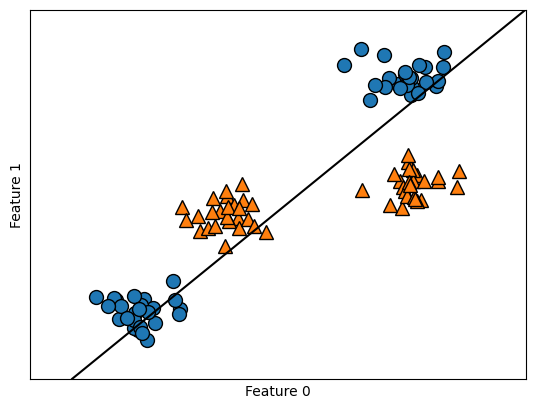

In [2]:
from sklearn.svm import LinearSVC
import mglearn

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### ChatGPTに出してもらったカーネル関数についての解説

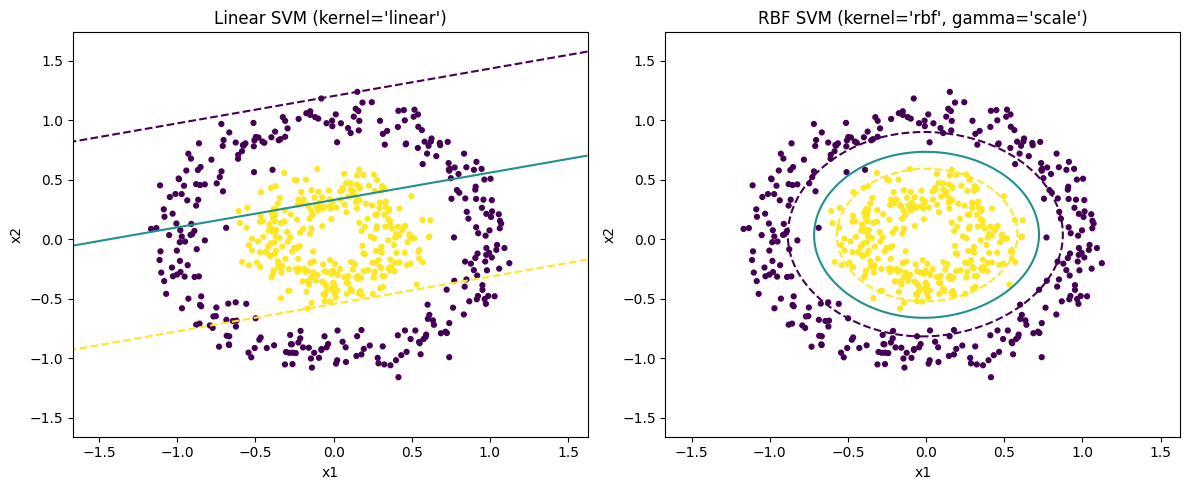

Train accuracy (Linear): 0.615
Train accuracy (RBF)   : 0.9966666666666667


In [3]:
# %%
# 円データを線形SVMとRBFカーネルSVMで分類して可視化
# ----------------------------------------------------
# 必要ライブラリ:
# pip install scikit-learn matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1) データ生成（内円=+1, 外円=-1 のような円状データ）
X, y = make_circles(n_samples=600, factor=0.4, noise=0.1, random_state=42)

# 2) 2つのモデルを用意
#    - 線形SVM（カーネルなし）
#    - RBFカーネルSVM（非線形境界）
linear_svm = Pipeline(
    [("scaler", StandardScaler()), ("svc", SVC(kernel="linear", C=1.0))]
)

rbf_svm = Pipeline(
    [("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))]
)

# 3) 学習
linear_svm.fit(X, y)
rbf_svm.fit(X, y)

# 4) 可視化用のグリッドを作成
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 400), np.linspace(x2_min, x2_max, 400)
)
grid = np.c_[xx1.ravel(), xx2.ravel()]


# 5) 予測スコア（決定関数）をメッシュ上で計算
def decision_values(model, points):
    # SVCはdecision_functionが決定関数値、なければpredict_probaから擬似的に
    svc = model.named_steps["svc"]
    if hasattr(svc, "decision_function"):
        z = model.decision_function(points)
    else:
        z = model.predict_proba(points)[:, 1] * 2 - 1
    return z


Z_linear = decision_values(linear_svm, grid).reshape(xx1.shape)
Z_rbf = decision_values(rbf_svm, grid).reshape(xx1.shape)

# 6) 描画
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 左: 線形SVM
ax = axes[0]
# 決定境界(0)とマージン(±1)を等高線で描く
cs = ax.contour(xx1, xx2, Z_linear, levels=[-1, 0, 1], linestyles=["--", "-", "--"])
ax.scatter(X[:, 0], X[:, 1], c=y, s=12)  # データ点
ax.set_title("Linear SVM (kernel='linear')")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)

# 右: RBFカーネルSVM
ax = axes[1]
cs = ax.contour(xx1, xx2, Z_rbf, levels=[-1, 0, 1], linestyles=["--", "-", "--"])
ax.scatter(X[:, 0], X[:, 1], c=y, s=12)
ax.set_title("RBF SVM (kernel='rbf', gamma='scale')")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)

plt.tight_layout()
plt.show()

# 7) ざっくり精度表示
from sklearn.metrics import accuracy_score

print("Train accuracy (Linear):", accuracy_score(y, linear_svm.predict(X)))
print("Train accuracy (RBF)   :", accuracy_score(y, rbf_svm.predict(X)))

# %%
# ★ チューニングのヒント
# - C: 大きいほど訓練データの誤分類を許さない（境界が複雑に）。小さいほど滑らかな境界。
# - gamma（RBF用）: 大きいほど局所的に反応（細かい境界）、小さいほど広域に反応（滑らか）。
#   例) SVC(kernel="rbf", C=10, gamma=0.5) などを試してみてください。

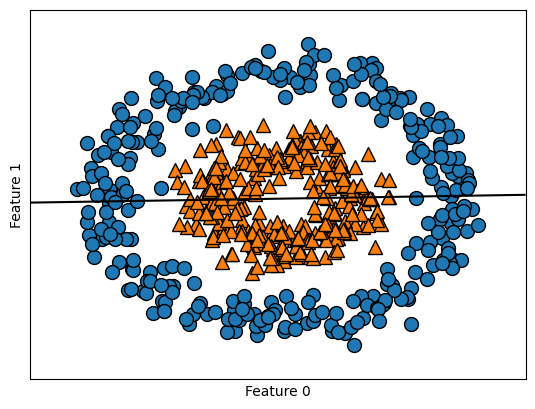

In [4]:
from sklearn.svm import LinearSVC
import mglearn

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

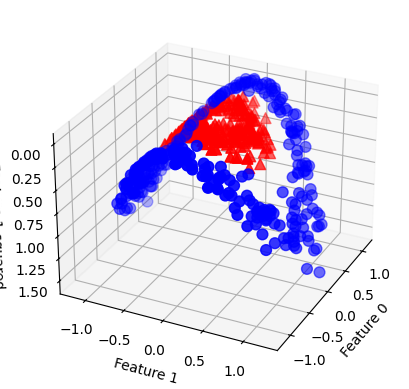

In [5]:
# 2番目の特徴量の2乗を追加
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure()
ax = figure.add_subplot(111, projection="3d", elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", s=60)
ax.scatter(
    X_new[~mask, 0],
    X_new[~mask, 1],
    X_new[~mask, 2],
    c="r",
    s=60,
    marker="^",
)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 squared")
plt.show()

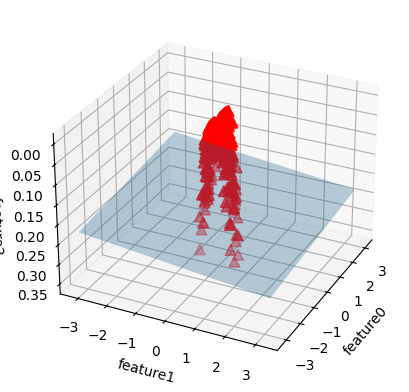

In [17]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 描画
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)

yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
eps = 1e-12 if np.isclose(coef[2], 0) else 0.0
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / (-coef[2] + eps)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker="^", s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature2")
plt.show()

## カーネルトリックの証明

### 1. 問題設定
サポートベクターマシン（SVM）の決定関数は、高次元空間での写像を用いると以下のように表される。

$$
f(x) = \text{sign}\Big(\sum_{i=1}^n \alpha_i y_i \, (\phi(x_i) \cdot \phi(x)) + b \Big)
$$

ここで必要なのは **$\phi(x_i)$ と $\phi(x)$ の内積** だけである。  
しかし $\phi(x)$ を明示的に計算するのは高次元では困難。

---

### 2. カーネル関数の定義
そこでカーネル関数 $K(x, x')$ を次のように定義する。

$$
K(x, x') = \phi(x) \cdot \phi(x')
$$

これにより、決定関数は次のように書き換えられる。

$$
f(x) = \text{sign}\Big(\sum_{i=1}^n \alpha_i y_i \, K(x_i, x) + b \Big)
$$

→ $\phi(x)$ を明示的に計算せず、カーネル関数だけで判定できる。

---

### 3. 具体例：多項式カーネル
入力ベクトルを

$$
x = (x_1, x_2), \quad x' = (x'_1, x'_2)
$$

とする。

#### 高次元への写像
次の写像を考える：

$$
\phi(x) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)
$$

#### 内積の計算
$$
\phi(x) \cdot \phi(x') = x_1^2 x_1'^2 + 2x_1x_2x_1'x_2' + x_2^2x_2'^2
$$

これは次のように展開できる：

$$
\phi(x) \cdot \phi(x') = (x_1x_1' + x_2x_2')^2 = (x \cdot x')^2
$$

---

### 4. 結論
よって、次が成り立つ。

$$
\phi(x) \cdot \phi(x') = K(x, x') = (x \cdot x')^2
$$

つまり「実際に3次元の写像を計算しなくても、元の空間で内積を2乗するだけで同じ効果が得られる」。

---

### 5. 一般化
- 多項式カーネル：
$$
K(x, x') = (x \cdot x' + c)^d
$$

- RBFカーネル：
$$
K(x, x') = \exp\Big(-\frac{\|x - x'\|^2}{2\sigma^2}\Big)
$$

いずれも $\phi(x)$ を明示的に計算せずに高次元空間の効果を得られる。  
これが **カーネルトリック** の核心である。
